## Gluing nodes and de Bruijn graphs

In [32]:
def Composition(DnaString:str, k:int):
    return [DnaString[i:k+i] for i in range(len(DnaString) - k + 1)]


def CompositionNoRepeats(DnaString:str, k:int):
    return list({
        DnaString[i:i+k]: [] for i in range(len(DnaString)-k+1)
    }.keys())

In [33]:
def Prefix(String:str):
    return String[:-1]


def Suffix(String:str):
    return String[1:]

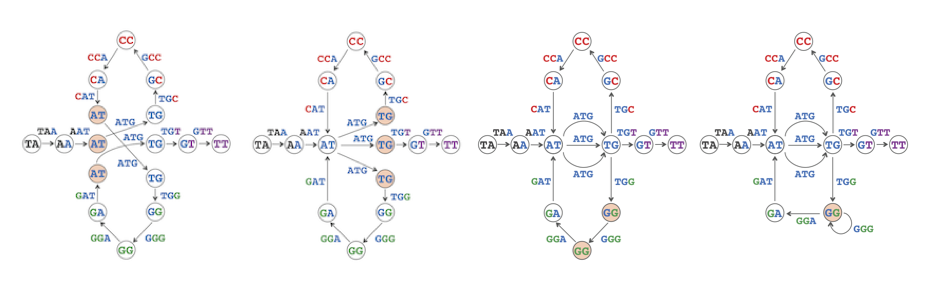

We create Graph from common 2-mers acting as ***nodes***, where our 3-mers act like ***edges***. After that we start gluing common nodes together, until we minimalise the Graph. 

**This is De Bruijn Graph of TAATGCCATGGGATGTT**

#### Hamiltonian Path Problem: 
Construct a Hamiltonian path in a graph

In [34]:
def DeBruijnGraphFromString(
    DnaString:str, k:int
):
    kMersList = Composition(DnaString, k)
    PrefixDict = {}    
    
    for kMer in kMersList:
        prefix = Prefix(kMer)
        suffix = Suffix(kMer)

        if prefix not in PrefixDict:
            PrefixDict[prefix] = list()
        PrefixDict[prefix].append(suffix)

    for key, value in sorted(PrefixDict.items()):
        print(f"{key}:", *value)

In [35]:
DeBruijnGraphFromString(
    DnaString='TAATGGGATGCCATGTT',
    k=4
)

AAT: ATG
ATG: TGG TGC TGT
CAT: ATG
CCA: CAT
GAT: ATG
GCC: CCA
GGA: GAT
GGG: GGA
TAA: AAT
TGC: GCC
TGG: GGG
TGT: GTT


Solving the String Reconstruction Problem reduces to finding a path in the de Bruijn graph that visits every edge exactly once. Such a path is called an Eulerian Path in honor of the great mathematician Leonhard Euler (pronounced “oiler").

Hamiltonian Path - graph that visits every node exactly once

Eulerian Path - graph that visits every edge exactly once

#### Eulerian Path Problem:
Construct an Eulerian path in a graph.

In [36]:
def DeBruijnGraphFromKMers(
    kMersList:list,
    printDict=False
):
    PrefixDict = {}    
    
    for kMer in kMersList:
        prefix = Prefix(kMer)
        suffix = Suffix(kMer)

        if prefix not in PrefixDict:
            PrefixDict[prefix] = list()
        PrefixDict[prefix].append(suffix)
    if printDict == True:
        for key, value in sorted(PrefixDict.items()):
            print(f"{key}:", *value)
    else:
        return PrefixDict

GAGG CAGG GGGG GGGA CAGG AGGG GGAG

In [37]:
DeBruijnGraphFromKMers(
    kMersList=[kMer for kMer in input().split()], printDict=False
)

{}

Thus we can create scheme of k-mers and edges knowing only list of k-mers, and the same way we know, how to create such scheme from genome string. That means we can restore genome from k-mers list via De Bruijn Graph

## Eulerian Cycle
Cycle in graph, that goes through every edge exactly once

In every Eulerian Cycle for every node number of incoming edges equals to number of outcoming edges

Balanced Graph: ***indegree=outdegree***. Meaning that every Eulerian Graph is balanced

#### Euler’s Theorem:
**Every balanced, strongly connected directed graph is Eulerian.**

When travelling through balanced Graph, we can stuck and not complete full path only if we started in a wrong place - not at the starting point!

So we can start at random point of a graph, try to comlete all the way, if we get stuck we can start again from last node of creatd path, where there are still unexplored edges! If we repeat such process, we will somewhen find a proper starting point and complete an Eulerian cycle!

In [38]:
def ConstructDictFromFile(dictFile, printDict=False):
    '''
    Func to construct dict from file
    '''
    with open(dictFile) as file:
        y = {
            line.split(': ')[0]:
            [ i for i in line.split(': ')[1].split() ]
            for line in file
    }
    if printDict == True:
        print(y)
    return y

In [39]:
ConstructDictFromFile('/Users/olegsuchalko/BioinformaticsAlgorithms/II.GenomeSequencing/Week_1/EulerianCycle/inputs/input_5.txt')

{'1': ['2'], '2': ['1', '2']}

In [40]:
from random import choice


def EulerianCycle(Graph, printList=False):
    remainingEdges = [ key+"-"+i for key in Graph for i in Graph[key] ]
    startNode = choice(list(Graph)) # делаем список ребер, берем случайный ключ и случайное значение из словаря 
    Neighbor = choice(Graph[startNode])
    remainingEdges.remove(f"{startNode}-{Neighbor}") # удаляем полученное ребро из списка

    Cycle = [startNode, Neighbor] # список для полученных значений + список вершин, после которых наступил тупик
    rejected=list()


    while remainingEdges: # пока у нас есть неиспользованные ребра, мы итерируем и берем последний элемент из Cycle
        lastNode = Cycle[-1]
        currentNodeList = list( set(lastNode+"-"+ i for i in Graph[lastNode]) & set(remainingEdges) ) 
        # смотрим, какие из ребер данной вершины остались в списке 

        if currentNodeList: # если ребро в списке, мы добавляем новый узел, ребро удаляем из списка
            currentNode = choice(currentNodeList)
            remainingEdges.remove(currentNode)
            Cycle.append(currentNode.split('-')[-1])
        else:
            # иначе мы кладем данное ребро в отклоненные вершины
            rejected.insert(0, lastNode)
            Cycle.pop(-1)

    # мы доходим до тупика, откатываемся до вершины, где есть еще неиспользованные ребра, делаем так использования всех ребер
    if printList == True:
        print(' '.join(Cycle + rejected))
    else:
        return list(Cycle + rejected)

In [41]:
def EulerianCycle2(Graph):
    # Prepare adjacency list
    adlist = Graph
    # Initialize cycle
    start = list(adlist.keys())[0]
    cycle = [start]
    next = ""
    current = start
    i = 0

    # Loop until all edges are traversed
    while len(adlist) > 0:
        if next == start:  # If stuck
            for node in cycle: # For every node in cycle
                if node in adlist.keys(): # Check until a node with unused edges is found
                    start = node # New starting point
                    current = node
                    i = cycle.index(node)
                    break
        next = adlist[current][0]
        cycle.insert(i+1, next)
        i += 1
        adlist[current].pop(0) # Remove used node from adjacency list

        if adlist[current] == []: # If the node has no outward unused edges left, delete it from the adjacency list
            del adlist[current]
        current = next

    return cycle

In [42]:
EulerianCycle(
    Graph=ConstructDictFromFile('/Users/olegsuchalko/BioinformaticsAlgorithms/II.GenomeSequencing/Week_1/EulerianCycle/inputs/input_1.txt'),
    printList=True
)

5 4 2 1 0 3 2 6 8 7 9 6 5


In [43]:
EulerianCycle2(
    Graph=ConstructDictFromFile('/Users/olegsuchalko/BioinformaticsAlgorithms/II.GenomeSequencing/Week_1/EulerianCycle/inputs/input_1.txt'),
)

['0', '3', '2', '6', '8', '7', '9', '6', '5', '4', '2', '1', '0']

**Cons of Func above**: There is no check for potential abscence of Eulerian Cycle!

## Eulerian Path

Consider a graph that does not have an Eulerian cycle but does have an Eulerian path.

If an Eulerian path in this graph connects a node v to a different node w, then the graph is nearly balanced, meaning that all its nodes except v and w are balanced. In this case, adding an extra edge from w to v transforms the Eulerian path into an Eulerian cycle. Thus, a nearly balanced graph has an Eulerian path if and only if adding an edge between its unbalanced nodes makes the graph balanced and strongly connected.

In [44]:
def CountDegrees(Graph):
    valuesList = [ val for lst in Graph.values() for val in lst ]
    degreeDict = {
        key: {
            "in": valuesList.count(key),
            "out": len(Graph[key])
        } for key in Graph
    }
    for val in valuesList:
        if val not in degreeDict:
            degreeDict[val] = {"in": valuesList.count(val), "out": 0}

    return degreeDict


def GraphStartPoint(Graph):
    degreesDict = CountDegrees(Graph)
    return max(
        degreesDict.keys(), 
        key=(lambda k: degreesDict[k]["out"] - degreesDict[k]["in"])
    )


def GraphEndPoint(Graph):
    degreesDict = CountDegrees(Graph)
    return max(
        degreesDict.keys(), 
        key=(lambda k: degreesDict[k]["in"] - degreesDict[k]["out"])
    )

In [45]:
GraphStartPoint(Graph=ConstructDictFromFile(
        dictFile='/Users/olegsuchalko/BioinformaticsAlgorithms/II.GenomeSequencing/Week_1/EulerianPath/inputs/input_1.txt'))

'6'

In [46]:
GraphEndPoint(Graph=ConstructDictFromFile(
        dictFile='/Users/olegsuchalko/BioinformaticsAlgorithms/II.GenomeSequencing/Week_1/EulerianPath/inputs/input_1.txt'))

'4'

In [47]:
CountDegrees(ConstructDictFromFile(
        dictFile='/Users/olegsuchalko/BioinformaticsAlgorithms/II.GenomeSequencing/Week_1/EulerianPath/inputs/input_1.txt'))

{'0': {'in': 1, 'out': 1},
 '1': {'in': 1, 'out': 1},
 '2': {'in': 1, 'out': 1},
 '3': {'in': 2, 'out': 2},
 '6': {'in': 1, 'out': 2},
 '7': {'in': 1, 'out': 1},
 '8': {'in': 1, 'out': 1},
 '9': {'in': 1, 'out': 1},
 '4': {'in': 1, 'out': 0}}

In [48]:
def EulerianPath(Graph:dict, printList=False):
    
    startNode = GraphStartPoint(Graph)
    endNode = GraphEndPoint(Graph)
    Neighbor = choice(Graph[startNode])

    remainingEdges = [ key+"-"+i for key in Graph for i in Graph[key] ]
    remainingEdges.remove(f"{startNode}-{Neighbor}") # удаляем полученное ребро из списка

    Cycle = [startNode, Neighbor] # список для полученных значений + список вершин, после которых наступил тупик
    rejected=list()

    while remainingEdges: # пока у нас есть неиспользованные ребра, мы итерируем и берем последний элемент из Cycle
        lastNode = Cycle[-1]
        

        if lastNode == endNode and endNode not in Graph:
            rejected.insert(0, lastNode)
            Cycle.pop(-1)
        
        else:
            currentNodeList = list( set(lastNode+"-"+ i for i in Graph[lastNode]) & set(remainingEdges) ) 
            # смотрим, какие из ребер данной вершины остались в списке 

            if currentNodeList: # если ребро в списке, мы добавляем новый узел, ребро удаляем из списка
                currentNode = choice(currentNodeList)
                remainingEdges.remove(currentNode)
                Cycle.append(currentNode.split('-')[-1])
            else:
                # иначе мы кладем данное ребро в отклоненные вершины
                rejected.insert(0, lastNode)
                Cycle.pop(-1)

    # мы доходим до тупика, откатываемся до вершины, где есть еще неиспользованные ребра, делаем так использования всех ребер
    if printList == True:
        print(' '.join(Cycle + rejected))
    else:
        return list(Cycle + rejected)

In [49]:
EulerianPath(
    Graph=ConstructDictFromFile(
        dictFile='/Users/olegsuchalko/Downloads/dataset_203_6 (1).txt', printDict=True
    )
)

{'0': ['3', '7'], '1': ['2'], '2': ['0', '5'], '3': ['1'], '4': ['2'], '7': ['8'], '8': ['9'], '9': ['0']}


['4', '2', '0', '7', '8', '9', '0', '3', '1', '2', '5']

##### You now have a method to assemble a genome, since the String Reconstruction Problem reduces to finding an Eulerian path in the de Bruijn graph generated from reads.

We can therefore summarize this solution using the following pseudocode, which relies on three problems that we have already solved:

1. The de Bruijn Graph Construction Problem;
2. The Eulerian Path Problem;
3. The String Spelled by a Genome Path Problem.

In [50]:
def PathToGenome(Path:list):
    return ''.join([Path[kMer][-1] if kMer != 0 else Path[kMer] for kMer in range(len(Path))])

In [51]:
def AssembleString(Patterns):
    dbGraph = DeBruijnGraphFromKMers(Patterns) # строим словарь из k-меров
    eulPath = EulerianPath(Graph=dbGraph) # находим в этом словаре Эйлеров путь
    return PathToGenome(eulPath) # собираем геном по полученному пути

In [52]:
with open('/Users/olegsuchalko/BioinformaticsAlgorithms/II.GenomeSequencing/Week_1/StringReconstruction/inputs/input_6.txt') as file:
    next(file)
    kMerPatterns = [kMer.strip() for kMer in file.readline().split()]
print(kMerPatterns)

# with open('/Users/olegsuchalko/Downloads/dataset_203_7.txt') as file:
#     next(file)
#     kMerPatterns = [kMer.strip() for kMer in file.readline().split()]
# print(kMerPatterns)

print("Assembly result:\t", AssembleString(Patterns=kMerPatterns))

with open('/Users/olegsuchalko/BioinformaticsAlgorithms/II.GenomeSequencing/Week_1/StringReconstruction/outputs/output_6.txt') as file:
    print("Answer from file:\t", file.readline())

print("Sometimes there are variations of output genome.")

['AG', 'AT', 'AA', 'GA', 'GG', 'GT', 'TA', 'TG', 'TT', 'AT']
Assembly result:	 ATGAATAGGTT
Answer from file:	 AAGTTGGATAT
Sometimes there are variations of output genome.


#### k-Universal Circular String Problem: 
Find a k-universal circular string. 

We should note that de Bruijn was interested in constructing k-universal circular strings. For example, 00011101 is a 3-universal circular string, as it contains each of the eight binary 3-mers (000, 001, 011, 111, 110, 101, 010, and 100) exactly once (see the figure below).

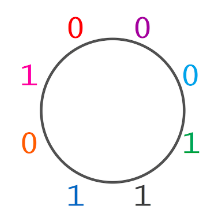

This problem models the assembly of a circular genome containing a single chromosome, like the genomes of most bacteria. We know that we can reconstruct a circular string from its k-mer composition by **finding an Eulerian cycle in the de Bruijn graph** constructed from these k-mers

In [53]:
from itertools import product

def kUniversalString(k, binary=True, printString=False):
    kMersBinaryList = [ ''.join(line) for line in product('01', repeat=k) ]
    if k < 5:
        print("All Binary kMers List:", kMersBinaryList, sep='\n')
    dbGraph = DeBruijnGraphFromKMers(kMersBinaryList)
    eulCycle = EulerianCycle(dbGraph)
    if printString == True:
        print(PathToGenome(eulCycle)[:-(k-1)])
    else:
        return PathToGenome(eulCycle)[:-(k-1)]

We take k-1 symbols from final string because it is circular. Due to this fact, we obtain 2 more kMers when closing the ring

In [54]:
kUniversalString(9)

'10000100101111101001110111100111101111111011101010000000001001100001000010100101010101110100100000111111111000101000011000111100100011101000001011001000011110101010011010011001001111000110011010100100110110110011111001010110111110000101111010001000100111000100000010101111110101101010110001101000110111101100000100011000000110010111000111000000011100101101001011000011101100101001111110011001110011101011110000011011000101110110101110010010100011111011011100110111011100001101011001100010010010001010100010110110'

Still not fast enough for big k

In [55]:
# import cProfile, pstats
# pr = cProfile.Profile()
# pr.enable()
# kUniversalString(15)
# pr.disable()

# sortby = 'tottime'
# ps = pstats.Stats(pr).sort_stats(sortby)
# print(ps.print_stats())